In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.metrics import structural_similarity

Text(0.5, 1.0, 'Data Image')

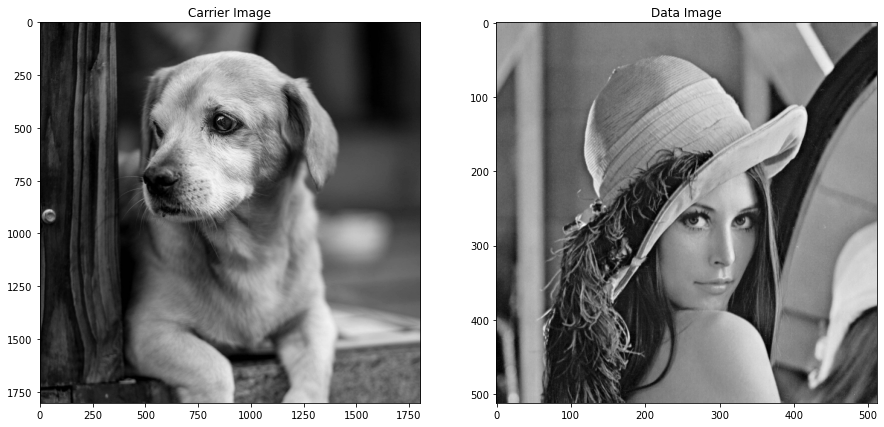

In [15]:
img1= cv2.imread('dog.jpg',0)
img2 =cv2.imread('Lenna.png',0)
height,width = img2.shape
#print(width*2)
Real=cv2.resize(img1,(height*2,width*2))
Embedded=cv2.resize(img1,(height*2,width*2))
# print(img1)
#print(img3)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img1,'gray')
plt.title('Carrier Image')
plt.subplot(1,2,2)
plt.imshow(img2,'gray')
plt.title('Data Image')


In [3]:
for i in range (Embedded.shape[0]):
    for j in range (Embedded.shape[1]):
        Embedded[i][j]=Embedded[i][j] & 252
           
#print(Embedded)

In [4]:
#Embedding Image

for i in range (img2.shape[0]):
    for j in range (img2.shape[1]):
        temp=img2[i][j]
        for k in range(2*i , 2*i +2):
            for l in range(2*j , 2*j +2):
                Embedded[k][l]=(temp & 3) | Embedded[k][l]
                temp=temp>>2

Text(0.5, 1.0, 'Carrier Image with hidden data')

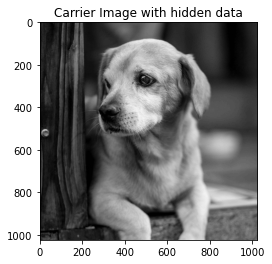

In [5]:
plt.imshow(Embedded,'gray')
plt.title('Carrier Image with hidden data')

In [6]:
#Extracting Image

height,width=Embedded.shape
height=int(height/2)
width=int(width/2)
Extract=np.zeros((height,width))
for i in range(Extract.shape[0]):
    for j in range(Extract.shape[1]):
        temp=0
        shift=0
        for k in range(2*i , 2*i +2):
            for l in range(2*j , 2*j +2):
               temp1=Embedded[k][l] & 3
               temp1=temp1 << shift
               temp=temp | temp1
               shift= shift + 2

        Extract[i][j]=temp


#print(Extract)


Text(0.5, 1.0, 'Resultant Data Image')

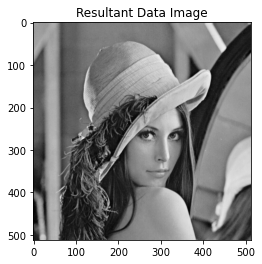

In [7]:
plt.imshow(Extract,'gray')
plt.title("Resultant Data Image")

In [8]:
MSE=0
for i in range(Real.shape[0]):
    for j in range(Real.shape[1]):
        MSE=MSE+(Real[i][j]-Embedded[i][j])*(Real[i][j]-Embedded[i][j])
MSE=MSE/(Real.shape[0]*Real.shape[1])
print(MSE)

2.3623743057250977


In [9]:
MSE1=0
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        MSE1=MSE1+(img2[i][j]-Extract[i][j])*(img2[i][j]-Extract[i][j])
MSE1=MSE1/(img2.shape[0]*img2.shape[1])
print(MSE1)

0.0


In [10]:
PSNR=20* math.log10(255/math.sqrt(MSE))
print(PSNR)

44.397316504727286


In [11]:
try:
    PSNR1=20* math.log10(255/math.sqrt(MSE1))
except:
    PSNR1=-999
print(PSNR1)

-999


In [12]:
(SSIM,diff) = structural_similarity(Real,Embedded,full=True)
print(SSIM)

0.9765592180167837


In [13]:
(SSIM1,diff) = structural_similarity(img2,Extract,full=True)
print(SSIM1)

1.0


Carrier & Stego MSE:  2.3623743057250977 PSNR:  44.397316504727286 SSIM 0.9765592180167837
Data & Recovered Data MSE:  0.0 PSNR:  -999 SSIM 1.0


Text(0.5, 1.0, 'Recovered Data')

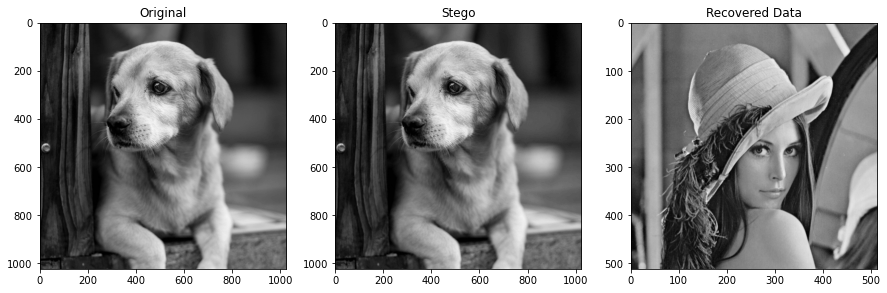

In [14]:
print('Carrier & Stego MSE: ',MSE,'PSNR: ',PSNR,'SSIM',SSIM)
print('Data & Recovered Data MSE: ',MSE1,'PSNR: ',PSNR1,'SSIM',SSIM1)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(Real,'gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(Embedded,'gray')
plt.title('Stego')
plt.subplot(1,3,3)
plt.imshow(Extract,'gray')
plt.title('Recovered Data')